# Flight Delays

Millions of people fly every day, and flight delays can be an unwelcome aspect of air travel. Just how often do flight delays occur?

In this project, I will work with airport flight data and explore how the day of week affects the likelihood of a delayed departure.

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
flights = pd.read_csv('flights.csv')
flights = flights.convert_dtypes()
pd.options.mode.chained_assignment = None  
flights


,scheduled,actual,carrier,flight,tailnum,origin,dest,air_time,distance
0,"04/29/2023, 16:35","04/29/2023, 17:01",WN,1079,N230WN,ATL,HOU,110,696
1,"07/02/2023, 15:10","07/02/2023, 15:05",DL,355,N953AT,ATL,GPT,54,352
2,"12/25/2023, 10:55","12/25/2023, 10:53",WN,291,N413WN,ATL,RDU,57,356
3,"09/01/2023, 12:50","09/01/2023, 12:48",DL,1132,N947DZ,ATL,TYS,28,152
4,"12/14/2023, 07:05","12/14/2023, 07:02",DL,40,N332DN,ATL,BOS,121,946
...,...,...,...,...,...,...,...,...,...
4995,"11/15/2023, 14:20","11/15/2023, 14:17",WN,13,N400WN,ATL,MCO,63,404
4996,"04/09/2023, 19:50","04/09/2023, 19:58",OH,1320,N567NN,ATL,CLT,42,226
4997,"12/14/2023, 13:20","12/14/2023, 13:16",DL,695,N363NB,ATL,DAL,103,721
4998,"12/06/2023, 13:05","12/06/2023, 13:01",DL,911,N992AT,ATL,GSO,56,306


The `scheduled` column represents the time the flight was scheduled, but the actual departure time is represented by the `actual` column. null We can use these columns to calculate flight delays.
Let's extract the two departure time columns.

In [61]:
departures = flights[['scheduled', 'actual']]
departures #display the dataframe

,scheduled,actual
0,"04/29/2023, 16:35","04/29/2023, 17:01"
1,"07/02/2023, 15:10","07/02/2023, 15:05"
2,"12/25/2023, 10:55","12/25/2023, 10:53"
3,"09/01/2023, 12:50","09/01/2023, 12:48"
4,"12/14/2023, 07:05","12/14/2023, 07:02"
...,...,...
4995,"11/15/2023, 14:20","11/15/2023, 14:17"
4996,"04/09/2023, 19:50","04/09/2023, 19:58"
4997,"12/14/2023, 13:20","12/14/2023, 13:16"
4998,"12/06/2023, 13:05","12/06/2023, 13:01"


What data types are being used for these departure times? Let's find out using the `info()` method.

In [62]:

departures.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   scheduled  5000 non-null   string
 1   actual     5000 non-null   string
dtypes: string(2)
memory usage: 78.2 KB


The time values are currently strings.

Strings are not well suited for numerical calculations. For calculations that involves dates and times, converting those strings to datetime objects is recommended.

### Convert strings to datetime

Pandas has a `to_datetime()` method that converts strings to datetime objects.

In [63]:
departures['scheduled'] = pd.to_datetime(departures['scheduled'])
departures['actual'] = pd.to_datetime(departures['actual'])
departures #display

,scheduled,actual
0,2023-04-29 16:35:00,2023-04-29 17:01:00
1,2023-07-02 15:10:00,2023-07-02 15:05:00
2,2023-12-25 10:55:00,2023-12-25 10:53:00
3,2023-09-01 12:50:00,2023-09-01 12:48:00
4,2023-12-14 07:05:00,2023-12-14 07:02:00
...,...,...
4995,2023-11-15 14:20:00,2023-11-15 14:17:00
4996,2023-04-09 19:50:00,2023-04-09 19:58:00
4997,2023-12-14 13:20:00,2023-12-14 13:16:00
4998,2023-12-06 13:05:00,2023-12-06 13:01:00


We can see there has been a slight formatting change.

Let's use `info()` to confirm the new data type.

In [64]:
departures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   scheduled  5000 non-null   datetime64[ns]
 1   actual     5000 non-null   datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 78.2 KB


Looks good! We now have datetime values that we can use to perform date and time calculations with.

# Calculate the delays

To identify the delayed flights, let's first calculate the amount of delay for each flight using our datetime columns. The equation for the amount of flight delay is:

`delay = actual − scheduled`

In [65]:
departures['delay'] = departures.eval('actual - scheduled')
departures #display

,scheduled,actual,delay
0,2023-04-29 16:35:00,2023-04-29 17:01:00,0 days 00:26:00
1,2023-07-02 15:10:00,2023-07-02 15:05:00,-1 days +23:55:00
2,2023-12-25 10:55:00,2023-12-25 10:53:00,-1 days +23:58:00
3,2023-09-01 12:50:00,2023-09-01 12:48:00,-1 days +23:58:00
4,2023-12-14 07:05:00,2023-12-14 07:02:00,-1 days +23:57:00
...,...,...,...
4995,2023-11-15 14:20:00,2023-11-15 14:17:00,-1 days +23:57:00
4996,2023-04-09 19:50:00,2023-04-09 19:58:00,0 days 00:08:00
4997,2023-12-14 13:20:00,2023-12-14 13:16:00,-1 days +23:56:00
4998,2023-12-06 13:05:00,2023-12-06 13:01:00,-1 days +23:56:00


We have a new `delay` column! The first flight in our dataframe left 26 minutes late. The second flight has a negative delay, indicating that it left 5 minutes early.

Airlines can leave a few minutes behind schedule without being considered late. Typically a flight is considered late if it departs more than 900 seconds (15 minutes) after the scheduled departure time.

Let's determine which flights are late using `dt.total_seconds()`.

In [66]:
departures['is_late'] = departures['delay'].dt.total_seconds() > 900
departures # display dataframe

,scheduled,actual,delay,is_late
0,2023-04-29 16:35:00,2023-04-29 17:01:00,0 days 00:26:00,True
1,2023-07-02 15:10:00,2023-07-02 15:05:00,-1 days +23:55:00,False
2,2023-12-25 10:55:00,2023-12-25 10:53:00,-1 days +23:58:00,False
3,2023-09-01 12:50:00,2023-09-01 12:48:00,-1 days +23:58:00,False
4,2023-12-14 07:05:00,2023-12-14 07:02:00,-1 days +23:57:00,False
...,...,...,...,...
4995,2023-11-15 14:20:00,2023-11-15 14:17:00,-1 days +23:57:00,False
4996,2023-04-09 19:50:00,2023-04-09 19:58:00,0 days 00:08:00,False
4997,2023-12-14 13:20:00,2023-12-14 13:16:00,-1 days +23:56:00,False
4998,2023-12-06 13:05:00,2023-12-06 13:01:00,-1 days +23:56:00,False


We now know which flights were delayed. Next up, calculating the day of week for each flight.

### Get the day of the week
In addition to supporting calculations, datetime objects allow us to get information such as the year, month, and day.

To do this, we take each datetime object and convert it to a formatted string using the string format time method, `strftime()`. The method uses format codes to represent the date and time. Below are a few examples:

`%d` - Day of the month as a zero-padded decimal number <br>
`%m` - Month as a zero-padded decimal number <br>
`%Y` - Year with century as a decimal number <br>

In [67]:
departures['day_name'] = departures['actual'].dt.strftime('%a')
departures #display
departures.to_csv('departures-check-point.tsv', index=False, sep='\t')

Each abbreviated day of the week is composed of three letters.

Now that we have the days of the week, let's calculate the percentage of flights that are delayed for each day of the week.

### Percentage flights delayed by day of week

To calculate the percentage of flights that are delayed, let's take the `mean()` of the `is_late` column for each day of the week. The mean of a True/False column equals the proportion of True values, as shown here.

I will then convert this proportion to a percentage by multiplying by 100.

In [68]:
proportion_delayed = departures.groupby('day_name')['is_late'].mean()
percent_delayed = proportion_delayed * 100
percent_delayed #Display series

day_name
Fri    22.593583
Mon    20.185923
Sat    18.558282
Sun    23.376623
Thu    20.939597
Tue    15.419847
Wed    16.691285
Name: is_late, dtype: float64

The index for the series is day_name. null Notice the series is ordered by the index alphabetically. From this we can see that the day with the highest percentage of delays is Sunday.

These differences will be easier to see in a graph, so let's create a bar chart.

### Plot the data
We are almost there! The percent_delayed series is ordered alphabetically. To plot the data, let's first reorder percent_delayed in natural day of the week order (Sun-Sat).

In [69]:
new_index_order = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
percent_delayed = percent_delayed.reindex(new_index_order)
percent_delayed

day_name
Sun    23.376623
Mon    20.185923
Tue    15.419847
Wed    16.691285
Thu    20.939597
Fri    22.593583
Sat    18.558282
Name: is_late, dtype: float64

Percent delayed is now ordered from Sunday through Saturday. We have a clean dataset that we can plot.

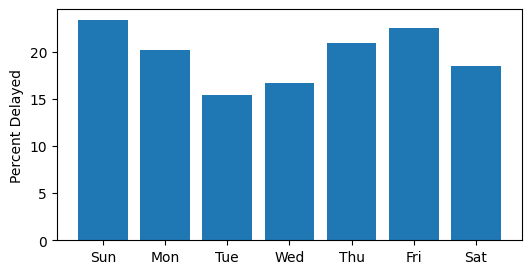

In [70]:
plt.figure(figsize=(6, 3))
plt.bar(percent_delayed.index, percent_delayed)
plt.ylabel('Percent Delayed')
plt.show()

The day of the week with the fewest late flights is Tuesday.